# Project: Investigate TMDb movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this analysis a dataset from TMBd has been used with all the information you need to assess the different genres of movies, frequency of production and their popularity. The dataset provides information about more than 10,000 movies! We have a lot of information to go through and assess whether we need it all or not. But first, let's decide on what questions we would like to answer!


### Questions
The analysis will primarily focus on different genres and amount of movies produced, three questions will be answered:
- Are the most produced genres also the most popular?
- Which were the most popular genres in 2000 compared to 2015?
- How did the amount of produced films changed over time?


In [27]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Changing scientific numbers to numeric numbers - see sources in the end of report
pd.options.display.float_format = '{:.2f}'.format

<a id='wrangling'></a>
## Data Wrangling

In this section we will start of by getting an overview of the data we are working with. How clean and tidy is the data? What are our next steps in order to complete our analysis?

In [28]:
# Load the data and print out a few lines.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


In [29]:
#understand the different datatypes, the quality of data and see all columns that are collapsed in .head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

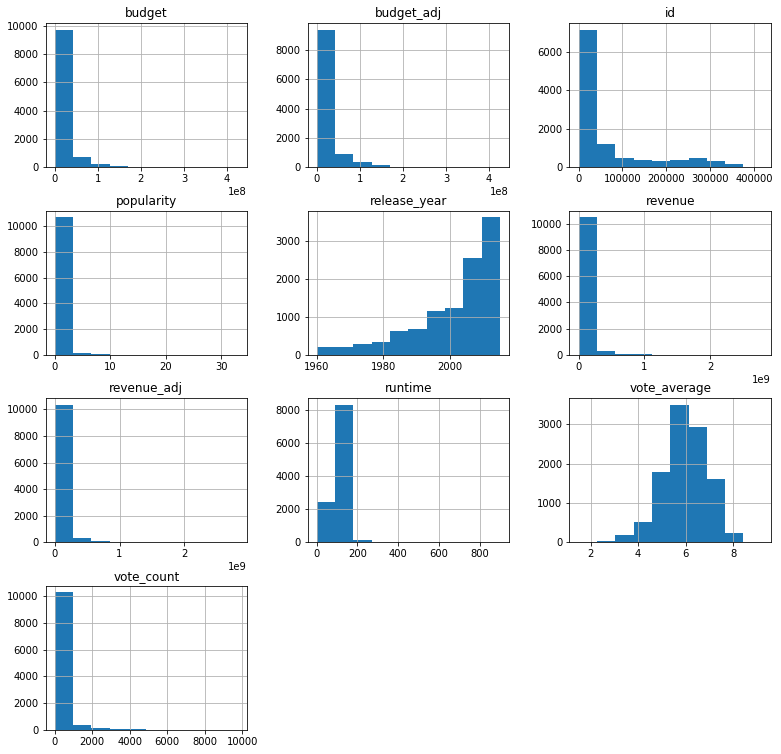

In [30]:
#Print histograms to get a broader picture of the underlying data
df.hist(figsize=(13,13));

**Each plot is a summary of the columns and represents the distribution of values which will be assessed below. The aim is to see how data is distributed and gives us information on the content of the data if we need to consider this in order to have proper values in our dataset.**

In [31]:
#A different view of the data to collect more information and include in the assessment
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


# Assessing the data after first analysis and defining next steps
The first impression is that we have some columns that need attention and some cleaning process before continuing. Some of the rows contain more than one value and are separated by a pipe (|). Moreover, there are some columns that are not necessary in order to complete the analysis and answer the questions proposed in the introduction of this paper, therefore, we will exclude some columns.

Columns that will be removed:
- imdb_id
- homepage
- tagline
- overview
- release_date

Columns that need cleaning in order to have a proper dataset:
- cast
- director
- keywords
- genres
- production_companies

Dealing with 0 and NaN:
After evaluating both df.info() and df.describe() and the histograms it can be concluded that we do in fact have a lot of data available, however big parts of the data include "0", especially columns related to budget and revenue. The values will be changed to "nan" and will be dropped for the analysis.


### Data Cleaning

In [32]:
# Remove 0 with NAN and drop data
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

df.dropna(axis=0, inplace=True)

In [33]:
#Splitting columns that include "|"
df_c = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
df_d = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))
df_k = (df['keywords'].str.split('|', expand=True).rename(columns=lambda x: f"keywords_{x+1}"))
df_g = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_p = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))

#Checking if split was successful
df_c.head()

,cast_1,cast_2,cast_3,cast_4,cast_5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [34]:
#Joining the splitted columns back with the original data and dropping unnecessary columns

df = df.join([df_c, df_d, df_k, df_g, df_p])
df = df.drop(['cast', 'keywords', 'director', 'genres', 'production_companies', 'imdb_id', 'homepage', 'overview', 'release_date', 'tagline'], axis=1)

In [35]:
#Checking for number of duplicates
df.duplicated().sum()

0

In [36]:
#Checking data type
df.dtypes

id                          int64
popularity                float64
budget                    float64
revenue                   float64
original_title             object
runtime                   float64
vote_count                  int64
vote_average              float64
release_year                int64
budget_adj                float64
revenue_adj               float64
cast_1                     object
cast_2                     object
cast_3                     object
cast_4                     object
cast_5                     object
director_1                 object
director_2                 object
director_3                 object
director_4                 object
director_5                 object
director_6                 object
keywords_1                 object
keywords_2                 object
keywords_3                 object
keywords_4                 object
keywords_5                 object
genres_1                   object
genres_2                   object
genres_3      

After conducting the planned procedures the data is now prepared for the analysis. We will now continue digging deeper into the data to have a look, if there are other duplicates or necessary actions that need to be taken.


In [37]:
df['original_title'].value_counts().head()

The Thing               2
The Fog                 2
Wanted                  2
The Three Musketeers    2
Clash of the Titans     2
Name: original_title, dtype: int64

Since the value_counts() shows that there might be double entries of movie names, a function to check double titles was defined in oder to have a deeper look in the rows with same movie title.

In [38]:
#Checking column for double titles - limiting to first 4 columns to see if values differ or not
limit_4_title = df['original_title'].value_counts().index.tolist()
limit_4_title = limit_4_title[:4]
limit_4_title

limit_4_id = df['original_title'].value_counts().index.tolist()

def check_double_title(names):
    for limit in limit_4_title:
        df_title = df[df['original_title'] == limit]
        print(df_title.iloc[:,:5])
        print("---")
        
check_double_title(limit_4_title)

         id  popularity      budget     revenue original_title
3472  60935        1.01 35000000.00 28128670.00      The Thing
8890   1091        2.36 10000000.00 13782838.00      The Thing
---
       id  popularity      budget     revenue original_title
6312  791        0.61 18000000.00 46201432.00        The Fog
7324  790        0.66  1000000.00 21378361.00        The Fog
---
         id  popularity      budget      revenue original_title
1733  22717        0.28       75.00       134.00         Wanted
2893   8909        1.98 75000000.00 258270008.00         Wanted
---
          id  popularity      budget      revenue        original_title
3425   52451        1.41 75000000.00 132274484.00  The Three Musketeers
10251  10057        0.79 30000000.00  53898845.00  The Three Musketeers
---


In [39]:
df.shape[0],df.shape[1]

(1287, 37)

The output shows us that despite having the same Movie Title the movies are different, since the values differ for each column. As a matter of fact I am a big fan of "The three muskuteers" and happen to know that there have been two releases of the movies, 1993 and 2013. With this information it is found reasonable that the title would appear twice, but the information itself will differ because the movies are entirely different. Therefore, these rows will be included for the rest of the analysis, no further drops are considered necessary. 

Moving on, we can see that we now have 1287 rows, which is a decrease after the drop of all NAN-values, which of course could (and will) affect the output of the questions that will be answered.

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: Are the most produced genres also the most popular?

In [40]:
# Selecting genres columns for the analysis of the original data frame
df_genres = df.loc[:, 'genres_1': 'genres_5' ]
# Adding release year
df_genres_dates = df_genres.join(df['release_year'])

In [41]:
years = df_genres_dates['release_year'].unique() #array of years mentioned in release year 
most_common = [] #list of tuples for most common genres in specific years

#for loop to create most_common list
for year in years:
    #creates df filtered by every year mentioned in years
    a = df_genres_dates[df_genres_dates['release_year'] == year] 
    #drops columns "release_year" to perferm stack value count in next line
    b = a.drop(['release_year'], axis = 1)
    #performs value count through genres 1-5 and stores the index of maximum count
    c = b.stack().value_counts().idxmax() 

    # masking DataFrame for respective years
    x = df[df['release_year'] == year]
    #creates the mean of vote_average and stores the index of maximum value
    y = x.groupby(['genres_1'])['vote_average'].mean().idxmax()
    if c == y:
        z = 'Equal'
    else:
        z = 'Not equal'
        #appends year with value count trough genres 1-5, the highest average vote_average and indicates if the resulting columns match
    most_common.append((year, c, y, z))

#creates df for list of tuples named most_common
df_most_popular = pd.DataFrame(most_common, columns=['release_year', 'popular_produced_genre', 'popular_voted_gerne', 'is_equal']).sort_values('release_year').reset_index().drop(['index'], axis=1)
df_most_popular

,release_year,popular_produced_genre,popular_voted_gerne,is_equal
0,1961,Family,Comedy,Not equal
1,1962,Thriller,Adventure,Not equal
2,1963,Thriller,Action,Not equal
3,1964,Music,Adventure,Not equal
4,1965,Thriller,Adventure,Not equal
5,1967,Thriller,Action,Not equal
6,1969,Thriller,Adventure,Not equal
7,1971,Thriller,Action,Not equal
8,1972,Drama,Drama,Equal
9,1973,Thriller,Drama,Not equal


In [42]:
df_most_popular['is_equal'].value_counts()

Not equal    44
Equal         7
Name: is_equal, dtype: int64

### Question 2: Which were the most popular genres in 2000 compared to 2015?

In [43]:
#Mask for release_year 2015
df_2015 = df_genres_dates[df_genres_dates['release_year'] == 2015].copy()
#drop release_year
df_2015.drop('release_year',axis=1, inplace=True)
#value_counts
df_2015 = df_2015.stack().value_counts()

In [44]:
#Mask for release_year 2000
df_2000 = df_genres_dates[df_genres_dates['release_year'] == 2000].copy()
#drop release_year
df_2000.drop('release_year',axis=1, inplace=True)
#value_counts 
df_2000 = df_2000.stack().value_counts()

In [45]:
#Comparing index of both dataframes
df_2015.index.sort_values(),df_2000.index.sort_values()

#Adjusting columns
df_2000['Animation'] = 0
df_2000['Crime'] = 0
df_2000['History'] = 0
df_2000['Horror'] = 0
df_2000['Music'] = 0
df_2000['Western'] = 0

#Sort by index
df_2015 = df_2015.sort_index()
df_2000 = df_2000.sort_index()

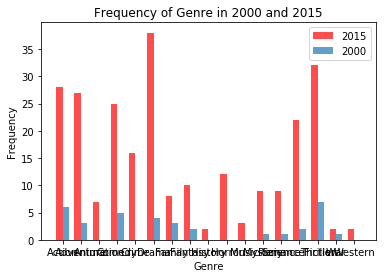

In [46]:
#Creating a plot with a bar chart with 2 bars to see the years side-by side
labels = df_2000.index.sort_values()
ind = np.arange(len(df_2015))  
width = 0.35       

# plot bars
red_bars = plt.bar(ind, df_2015, width, color='red', alpha=.7, label='2015')
white_bars = plt.bar(ind + width, df_2000, width, color='tab:blue', alpha=.7, label='2000')

# title and labels
plt.ylabel('Frequency')
plt.xlabel('Genre')
plt.title('Frequency of Genre in 2000 and 2015')
locations = ind + width / 2  # xtick locations
labels = labels # xtick labels
plt.xticks(locations, labels)
plt.rcParams["figure.figsize"] = (20,20)
# legend
plt.legend();

**This plot shows us the frequency of producing movies for each genre and also comparing the year 2015 with 2000.**

### Question 3: How did the amount of produced films changed over time?

In [47]:
amount_of_movies = [] #creates a list for amount of movies

for year in years:
    d = df_genres_dates[df_genres_dates['release_year'] == year] #creates df filtered by every year mentioned in years
    e = len(d.index) #determines the number of rows 
    amount_of_movies.append((year, e)) #appends year with respective number of rows
    
#creates df for list of amount_of_movies
df_amount_of_movies = pd.DataFrame(amount_of_movies, columns=['release_year', 'amount_of_movies']).sort_values('release_year').reset_index().drop(['index'], axis=1)

,release_year,amount_of_movies
0,1961,1
1,1962,1
2,1963,1
3,1964,2
4,1965,1
5,1967,1
6,1969,1
7,1971,4
8,1972,1
9,1973,2


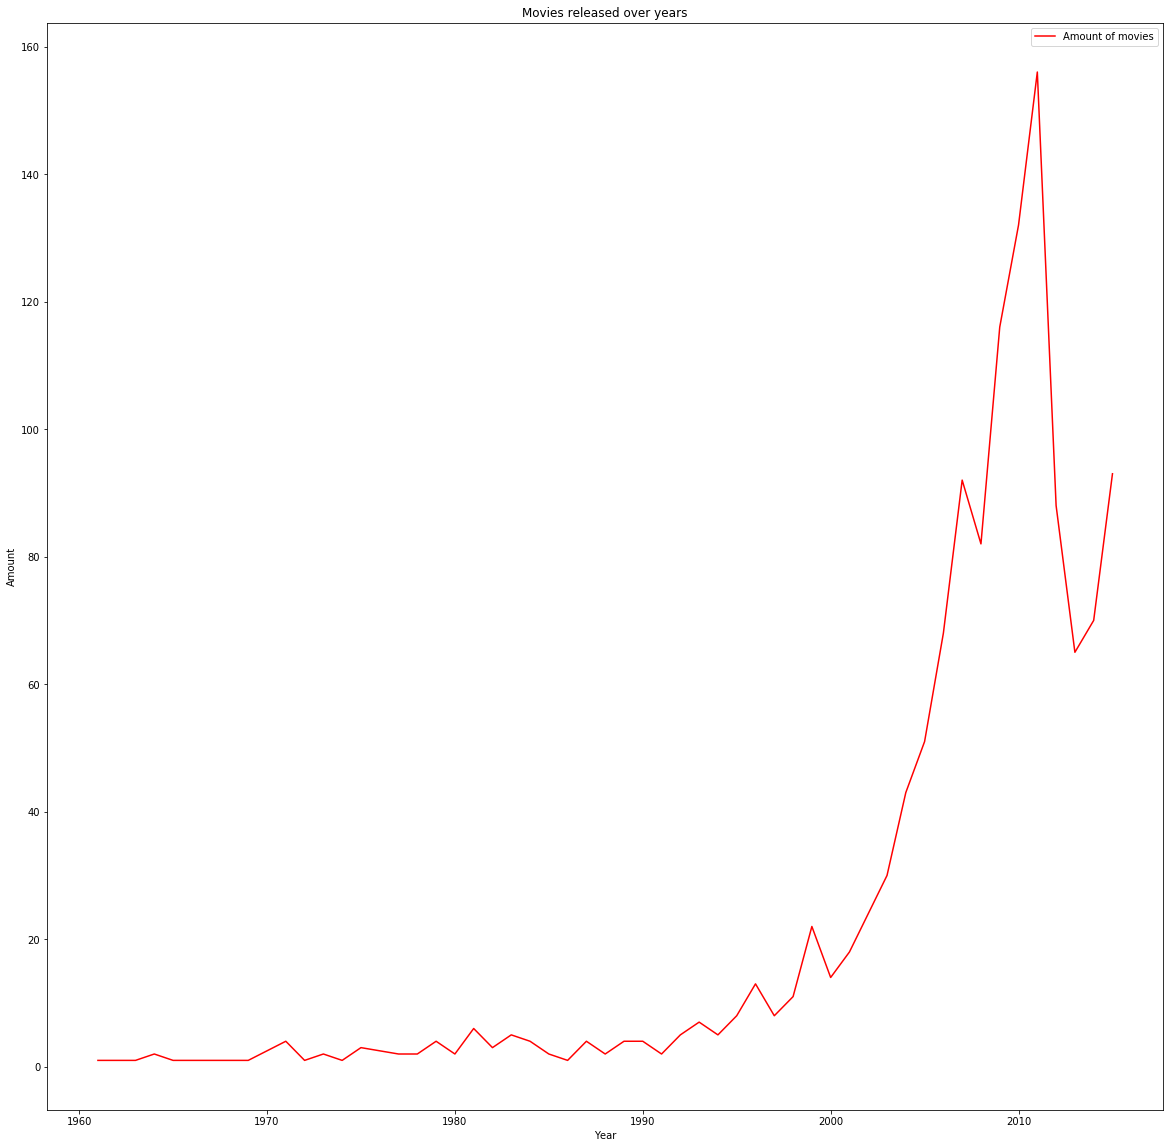

In [48]:
#Creating a table and chart to see the amount of movies
df_amount_of_movies.plot(x='release_year', y='amount_of_movies', kind='line', color='r', figsize=(20,20), title="Movies released over years", label="Amount of movies")
plt.xlabel('Year')
plt.ylabel('Amount');
df_amount_of_movies

**The table shows amount of movies produced for each year.
The plot shows the trend of the amount of movies produced over the years.**


<a id='conclusions'></a>
## Conclusions
The first research question "Are the most produced genres also the most popular?" shows that the most produced genre was not necessarily the highest voted genre. In fact there were more instances where these two differed from each other (that is amount of produced movies in a certain genre with the highest votes). This indicates that although a certain genre is being produced more frequently for a certain year, it is not certain that it will be the most popular. An additional analysis that could be interesting is adding budget and revenue to this finding. Further research could be to find out if the most produced movies are also the most profitable? What would this finding give us if we compared to highest votes and also budget? (Could we perhaps find which genre has the lowest budget, highest votes and highest profit?) 

The second question, "Which were the most popular genres in 2000 compared to 2015?", we can firstly see the huge difference in amount of produced movies between the years. Drama was the most popular genre in 2015, followed by Thriller and Action which in fact were also the most popular in 2000 (together with Comedy). To conclude, the genres Action and Thriller have always been popular (or at least produced a lot) even 15 years afterwards. Further research could be to include director and revenue to see if a certain director has been more profitable than others (and also in relation to genre).

Third question. We chose to analyse the amount of movies over the years. From the line chart it is easy to see that the number of produced movies has increased over the years. A slight drop after 2010 - which would have to be analyzed further on why (could be lack of information, other world issues that affected the production), but for the time being and answering the question, we are concluding that the number of movies over years has indeed increased. And it's an indication of how large the industry has grown over the years.


### Limitations
Results are limited by the underlying dataset and for simplicity no statistical tests have been made ande therefore such conclusions can't be implied. This analysis will only give an overview and indication of the data, no decision-making or such should be made based on the result as many entries were omitted due to missing data.

# Sources

Source for splitting columns: 
https://apassionatechie.wordpress.com/2018/02/24/how-do-i-split-a-string-into-several-columns-in-a-dataframe-with-pandas-python/

Source for concerting numbers 
https://stackoverflow.com/questions/38689125/how-to-get-rid-of-pandas-converting-large-numbers-in-excel-sheet-to-exponential


In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0